<a href="https://colab.research.google.com/github/JyothilalithaP/MineralTargeting/blob/main/Mineral_Targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                FID            gid       objectid             X             Y  \
count  10004.000000   10004.000000   10004.000000  10004.000000  10004.000000   
mean    5002.000000   71501.497701   71508.629248     76.838580     14.807762   
std     2887.617357   67707.603965   67729.429501      0.491659      0.560794   
min        1.000000     129.000000     129.000000     76.009167     13.759000   
25%     2501.750000    4381.750000    4381.750000     76.425875     14.349410   
50%     5002.000000   77531.500000   77531.500000     76.833400     14.813406   
75%     7502.250000   99356.250000   99356.250000     77.231481     15.295190   
max    10003.000000  279187.000000  279369.000000     77.749999     15.744565   

             Si02_%       Al2O3_%       Fe2O3_%        TiO2_%         CaO_%  \
count  10004.000000  10004.000000  10004.000000  10004.000000  10004.000000   
mean      60.897003     14.485497      5.561845      0.578054      3.158917   
std        6.800100      2.622647

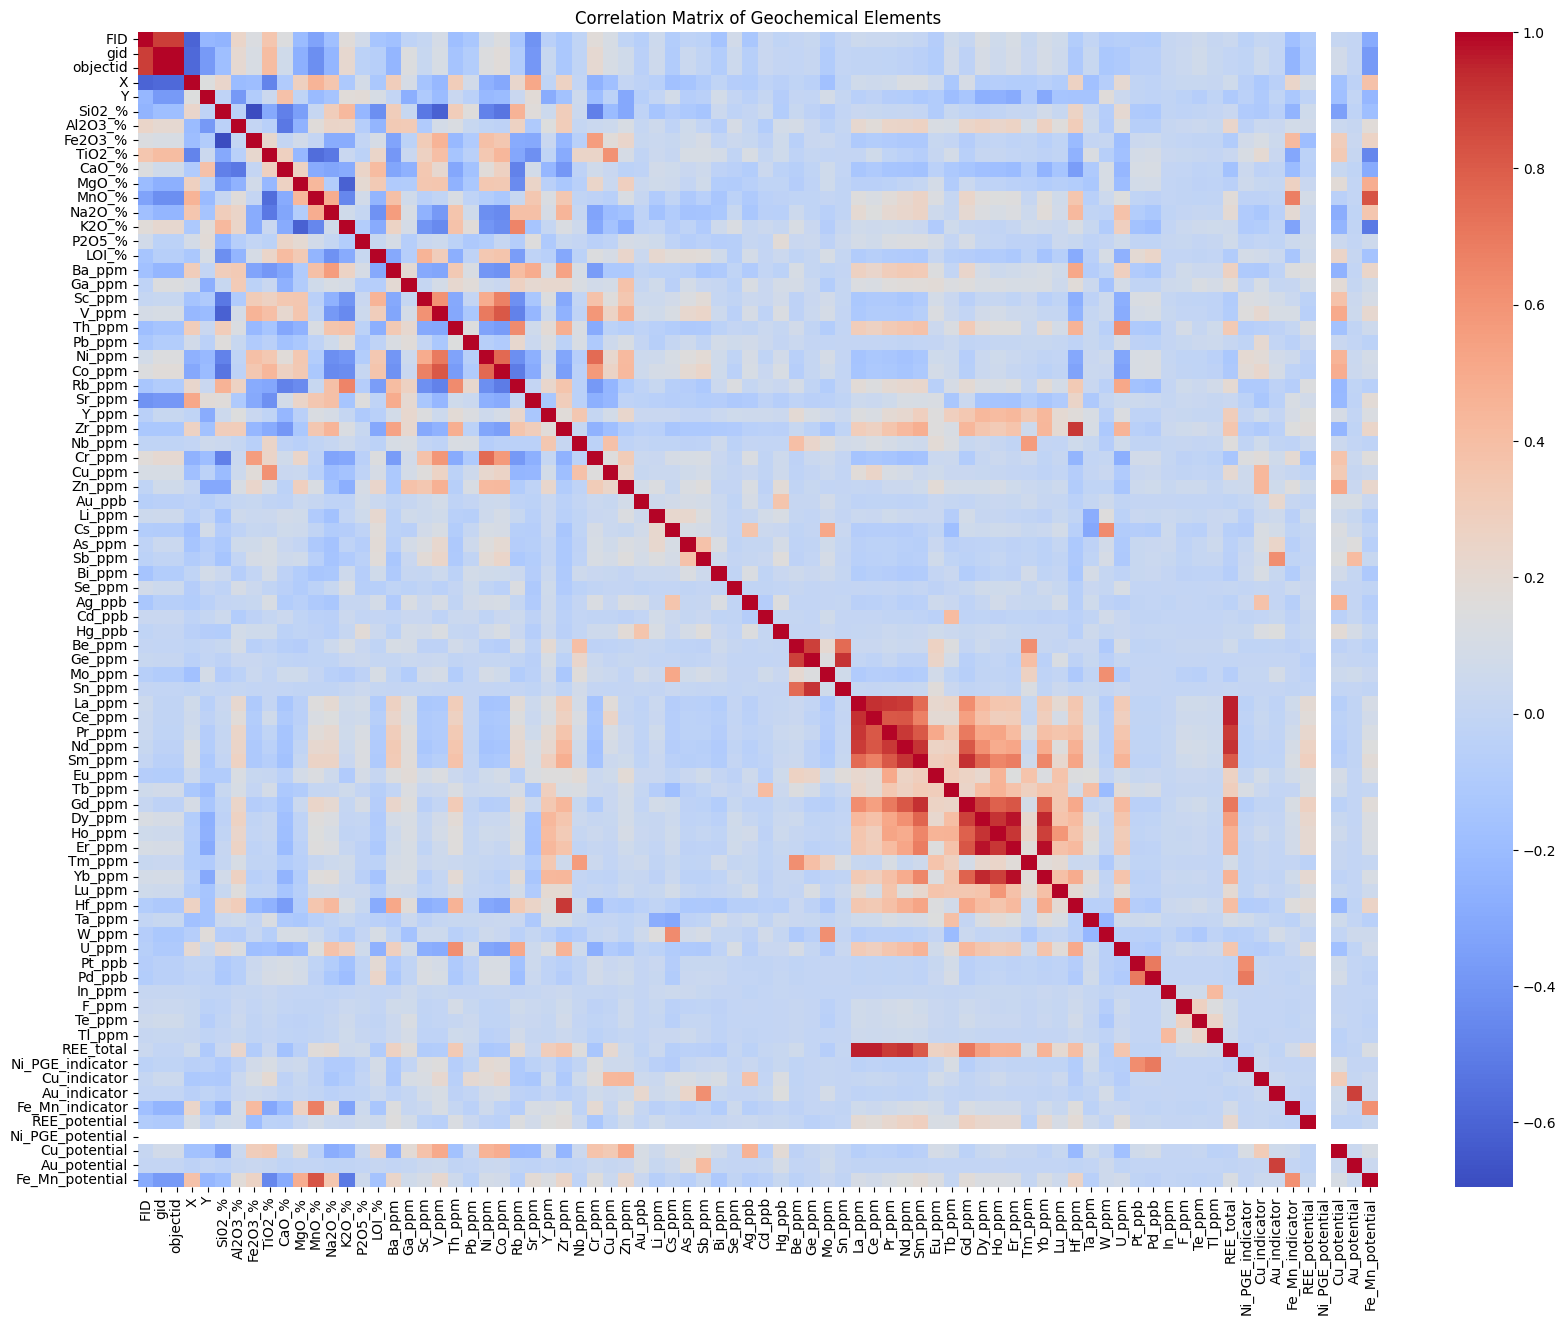

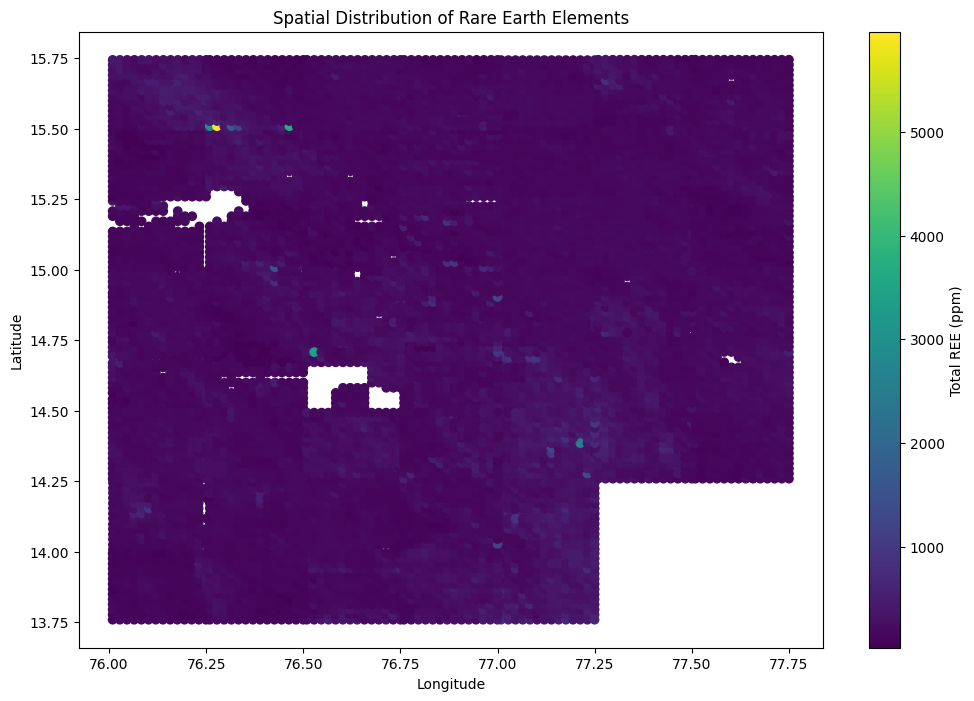


Training model for REE_potential
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00      1886

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



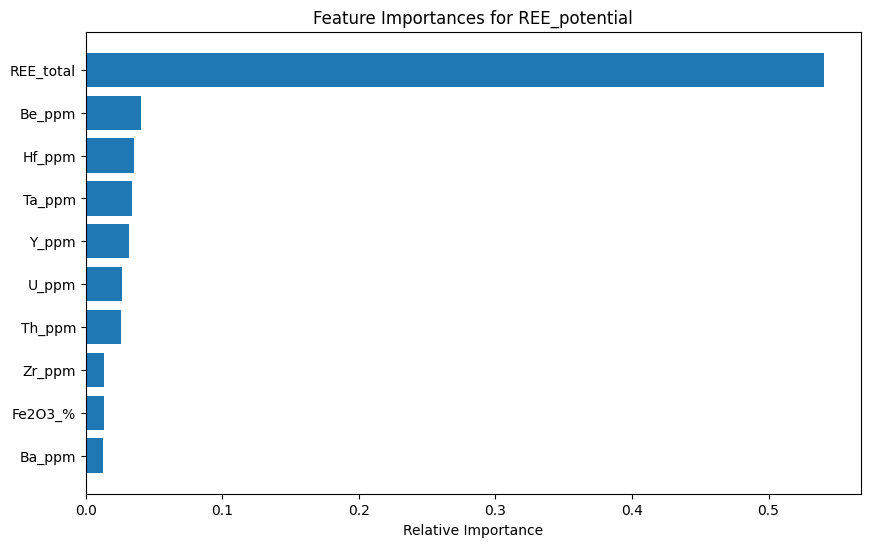


Training model for Ni_PGE_potential
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



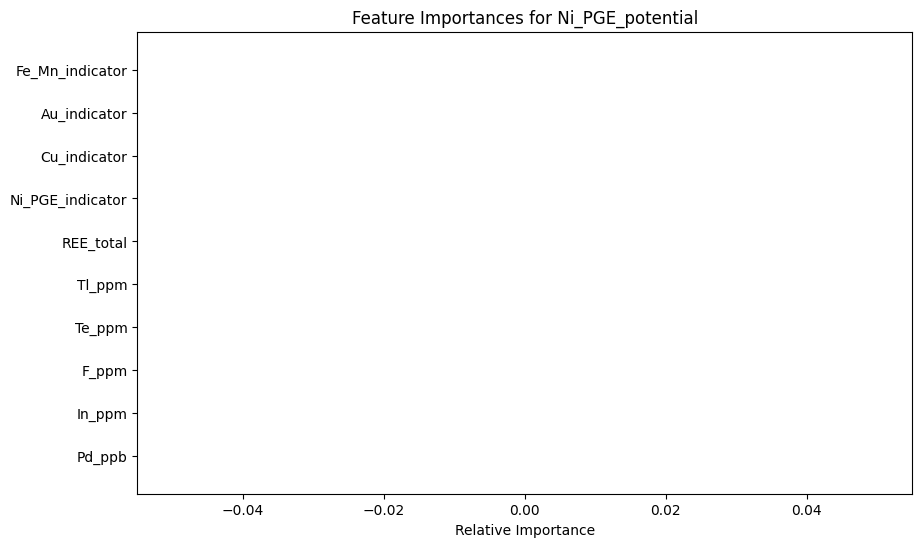


Training model for Cu_potential
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1581
           1       1.00      1.00      1.00       420

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



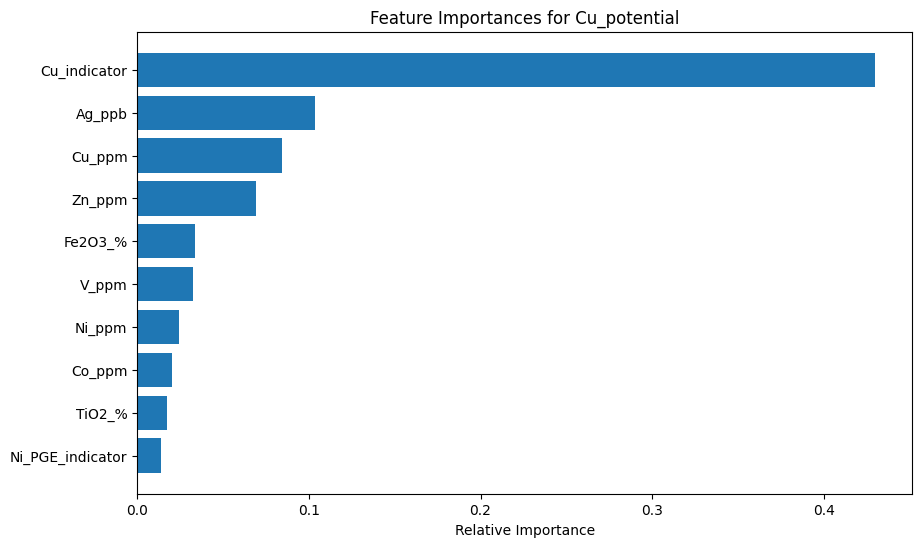


Training model for Au_potential
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



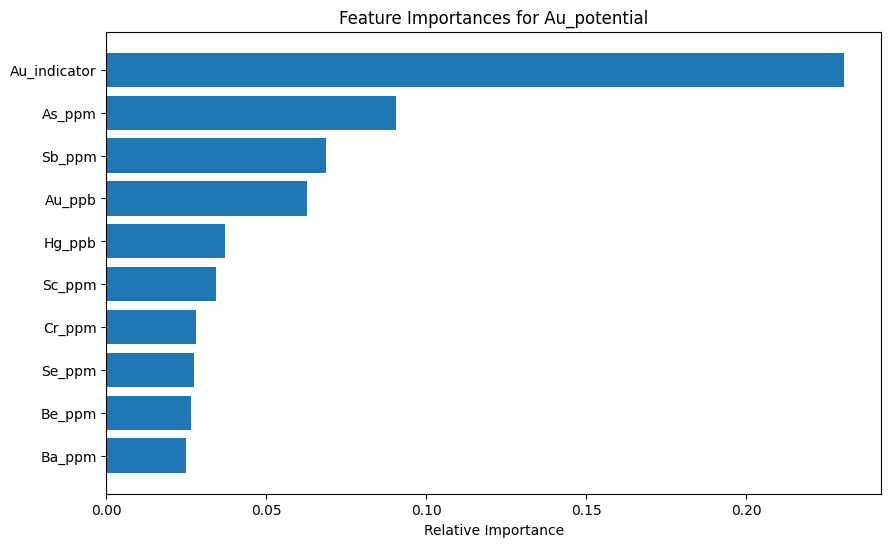


Training model for Fe_Mn_potential
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00       492

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



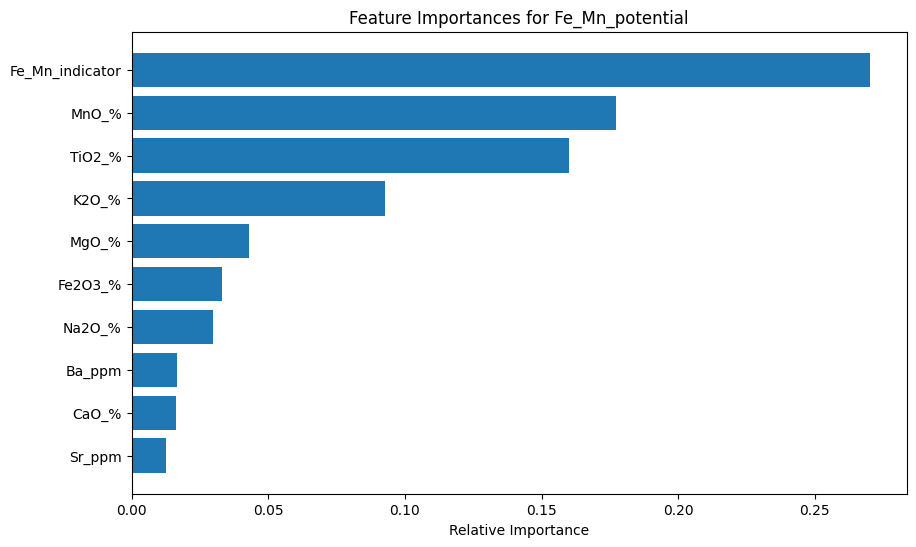

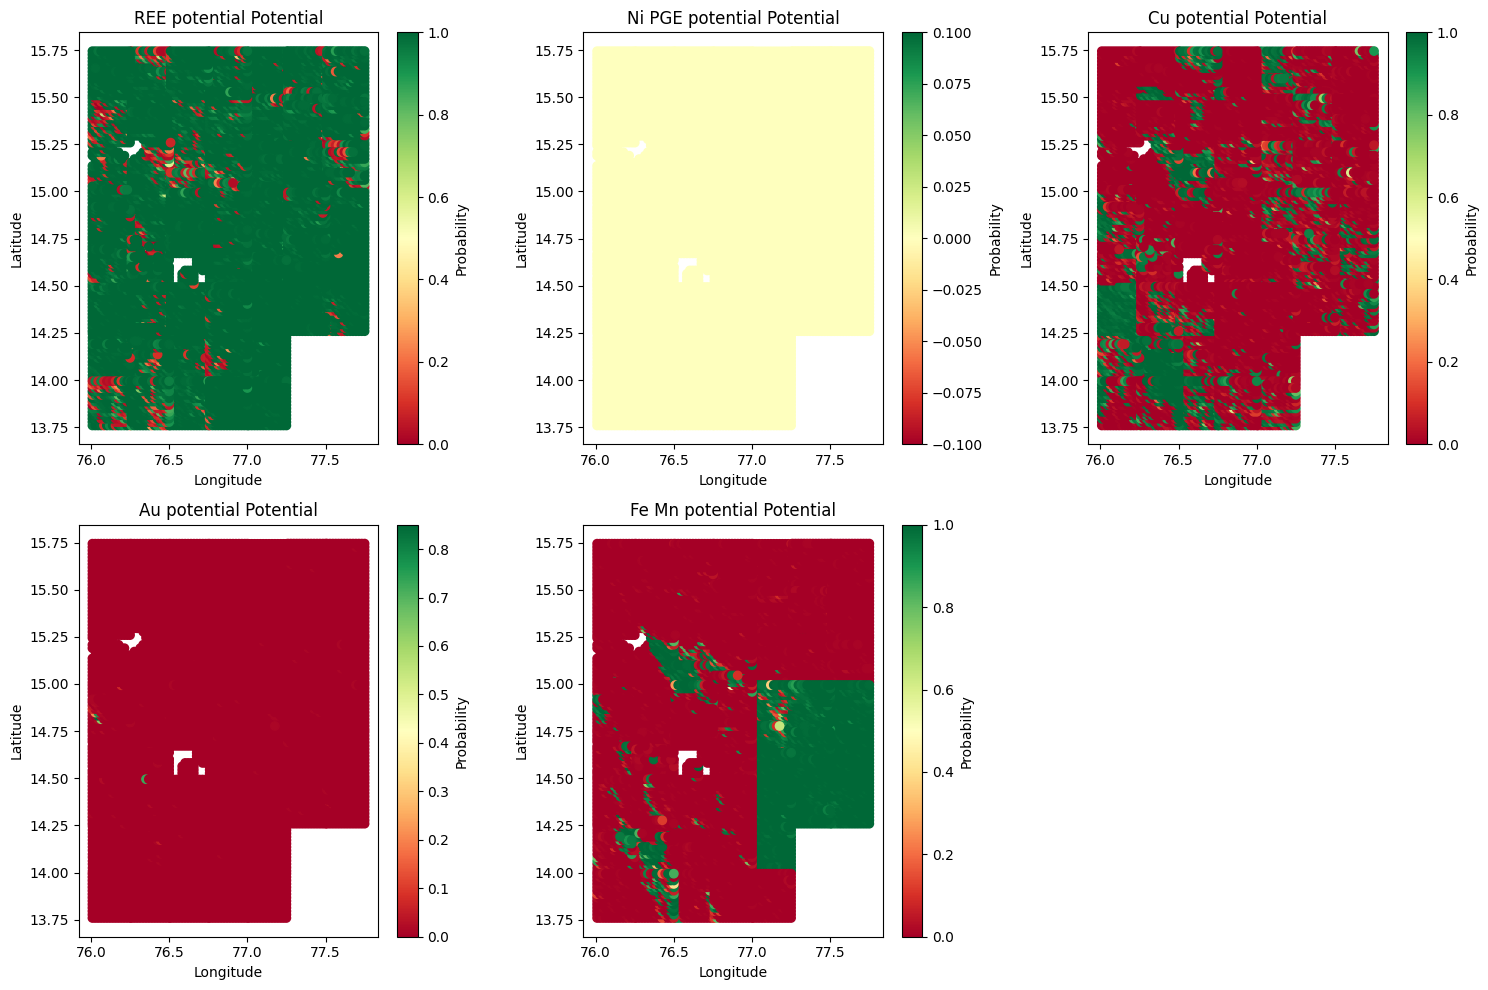

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('NGCM-Stream-Sediment-Analysis-Updated.xlsx')
df.replace(0, np.nan, inplace=True)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),columns=df.select_dtypes(include=[np.number]).columns)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df_clean = pd.concat([df[non_numeric_cols].reset_index(drop=True),df_imputed.reset_index(drop=True)], axis=1)
ree_elements = ['La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm',
               'Gd_ppm', 'Tb_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm',
               'Yb_ppm', 'Lu_ppm', 'Y_ppm']
df_clean['REE_total'] = df_clean[ree_elements].sum(axis=1)
df_clean['Ni_PGE_indicator'] = df_clean['Ni_ppm'] * df_clean['Pt_ppb'] * df_clean['Pd_ppb']
df_clean['Cu_indicator'] = df_clean['Cu_ppm'] * df_clean['Zn_ppm'] * df_clean['Ag_ppb']
df_clean['Au_indicator'] = df_clean['Au_ppb'] * df_clean['As_ppm'] * df_clean['Sb_ppm']
df_clean['Fe_Mn_indicator'] = df_clean['Fe2O3_%'] * df_clean['MnO_%']
df_clean['REE_potential'] = (df_clean['REE_total'] > 100).astype(int)
df_clean['Ni_PGE_potential'] = (df_clean['Ni_PGE_indicator'] > 10000).astype(int)
df_clean['Cu_potential'] = (df_clean['Cu_indicator'] > 50000).astype(int)
df_clean['Au_potential'] = (df_clean['Au_indicator'] > 5000).astype(int)
df_clean['Fe_Mn_potential'] = (df_clean['Fe_Mn_indicator'] > 2).astype(int)
print(df_clean.describe())
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Geochemical Elements')
plt.show()
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['X'], df_clean['Y'], c=df_clean['REE_total'], cmap='viridis')
plt.colorbar(label='Total REE (ppm)')
plt.title('Spatial Distribution of Rare Earth Elements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
features = ['Si02_%', 'Al2O3_%', 'Fe2O3_%', 'TiO2_%', 'CaO_%', 'MgO_%', 'MnO_%',
           'Na2O_%', 'K2O_%', 'P2O5_%', 'LOI_%', 'Ba_ppm', 'Ga_ppm', 'Sc_ppm',
           'V_ppm', 'Th_ppm', 'Pb_ppm', 'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm',
           'Y_ppm', 'Zr_ppm', 'Nb_ppm', 'Cr_ppm', 'Cu_ppm', 'Zn_ppm', 'Au_ppb',
           'Li_ppm', 'Cs_ppm', 'As_ppm', 'Sb_ppm', 'Bi_ppm', 'Se_ppm', 'Ag_ppb',
           'Cd_ppb', 'Hg_ppb', 'Be_ppm', 'Ge_ppm', 'Mo_ppm', 'Sn_ppm', 'Hf_ppm',
           'Ta_ppm', 'W_ppm', 'U_ppm', 'Pt_ppb', 'Pd_ppb', 'In_ppm', 'F_ppm',
           'Te_ppm', 'Tl_ppm', 'REE_total', 'Ni_PGE_indicator', 'Cu_indicator',
           'Au_indicator', 'Fe_Mn_indicator']
targets = ['REE_potential', 'Ni_PGE_potential', 'Cu_potential', 'Au_potential', 'Fe_Mn_potential']
X = df_clean[features]
y = df_clean[targets]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {}

for target in targets:
    print(f"\nTraining model for {target}")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[target])
    models[target] = rf
    y_pred = rf.predict(X_test)
    print(classification_report(y_test[target], y_pred))
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {target}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

for target in targets:
    if models[target].predict_proba(X_scaled).shape[1] > 1:
        df_clean[f'{target}_prob'] = models[target].predict_proba(X_scaled)[:, 1]
    else:
        df_clean[f'{target}_prob'] = 0

plt.figure(figsize=(15, 10))
for i, target in enumerate(targets, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_clean['X'], df_clean['Y'], c=df_clean[f'{target}_prob'], cmap='RdYlGn')
    plt.colorbar(label='Probability')
    plt.title(f'{target.replace("_", " ")} Potential')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()
plt.show()